In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
insurence = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurence

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurence.charges.max()

63770.42801

In [ ]:
insurence_one_hot = pd.get_dummies(insurence)
insurence_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

#Create X values -> FEATURES O caracteristicas que generan el resultado
X= insurence_one_hot.drop("charges", axis = 1 )
#Create y values -> variable dependiente O resultado
y = insurence_one_hot["charges"]


#Create traning a test sets
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2,random_state=42)


In [ ]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
#Build a neural networl

tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) 


model.fit(tf.expand_dims(X_train,axis=1), y_train, epochs = 100, verbose = 0)

In [ ]:

y_preds = model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 8628.2490 - mae: 8628.2490


In [ ]:
y_test.median()

8487.8803

In [ ]:
#Build a neural networl +500 epoch

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

model2.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]) 


model2.fit(tf.expand_dims(X_train,axis=1), y_train, epochs = 500, verbose = 0)

In [ ]:

y_preds2 = model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4612.0957 - mae: 4612.0957


In [ ]:
#Build a neural networl + 3 layers

tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model3.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]) 


history = model3.fit(tf.expand_dims(X_train,axis=1), y_train, epochs = 1000, verbose = 0, callbacks=[callback])

In [ ]:
len(X_test), len(y_test)

(268, 268)

In [ ]:
y_preds3 = model3.predict(X_test)
model3.evaluate(X_test,y_test)
X_train=np.arange(0,len(X_train),1)
X_test=np.arange(0,len(X_test),1)



9/9 [==============================] - 0s 3ms/step - loss: 3198.4609 - mae: 3198.4609


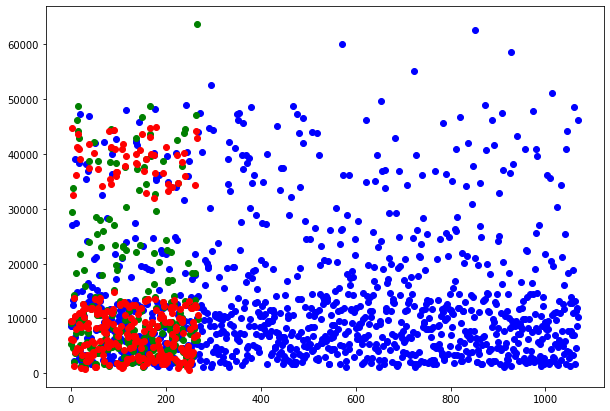

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data= X_test,
                     test_labels=y_test,
                     predictions =y_preds):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b", label ="Training data")
  plt.scatter(test_data, test_labels,c="g", label ="test data")
  plt.scatter(test_data, predictions, c="r", label="predictions")

plot_predictions(predictions = y_preds3)

Text(0.5, 0, 'expochs')

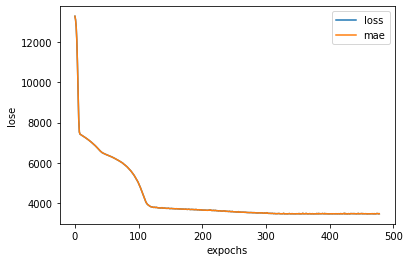

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("lose")
plt.xlabel("expochs")

In [ ]:
#Preprocesing data 2.0 ->Scale Features (Normalization and standaritation)
#Many Machine Learning algorithms perform better or converge faster when a feature are on a relatively similar scale
import pandas as pd

insurence = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Transfor  column all the columns where are numerical features

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    
)

#Create X & y 

X = insurence.drop("charges", axis = 1)
y = insurence["charges"]

# Test and train 

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2,random_state=42)


# Fit de column transformer

ct.fit(X_train)

#Transform traning and test data with normalization (MinMaxScaler) and OneHotEncoder

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)





In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#Build a neural networl + 3 layers
import tensorflow as tf

tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50)
model4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                              tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)
])

model4.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"]) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 *10**(epoch/20))


history = model4.fit(tf.expand_dims(X_train_normal,axis=1), y_train, epochs = 50, verbose = 0, callbacks=[callback, lr_scheduler])

In [ ]:
len(X_train_normal), len(y_train), len(X_test_normal)

(1070, 1070, 268, 268)

In [ ]:
X_train_normal.size , y_train.size


(11770, 1070)

ValueError: ignored

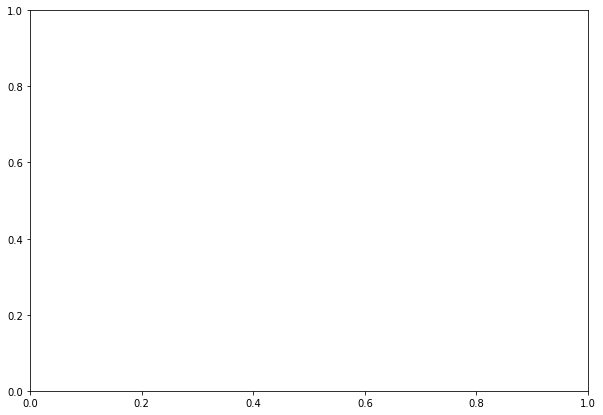

In [ ]:
y_predict2 = model4.predict(X_test_normal)


def plot_predictions(train_data = X_train_normal,
                     train_labels=y_train,
                     test_data= X_test_normal,
                     test_labels=y_test,
                     predictions =y_predict2):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels,c="b", label ="Training data")
  plt.scatter(test_data, test_labels,c="g", label ="test data")
  plt.scatter(test_data, predictions, c="r", label="predictions")

plot_predictions(predictions = y_preds3)


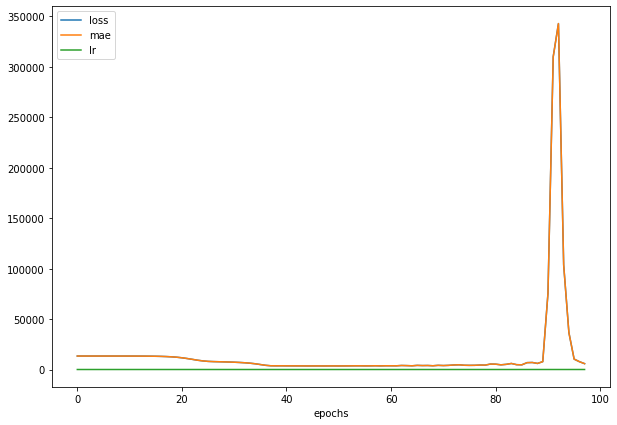

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel = "epochs")

$ y = (x-5)^2$ 

Text(0, 0.5, 'mae')

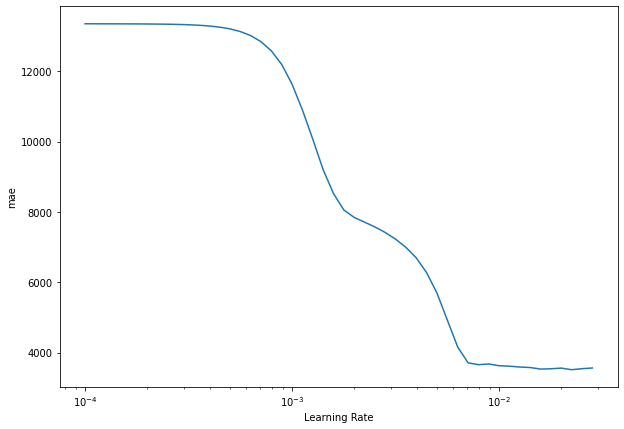

In [ ]:
lrs = 1e-4 *(10**(tf.range(50)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("mae")